## Observations and Insights 

In [ ]:
#1. More weight that the mouse had, the tumor vol would be higher compared to other mice with overall average weight 
#2. There is a drastic decline with the mice tumor vol and timepoints the decline starts dropping around 45.5 mm3 to 38.0 mm3 at the timepoints between 25-30
#3. 25% of mice that were female were put on the Propriva Drug regimen

In [25]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data_df= pd.merge(mouse_metadata, study_results, on=["Mouse ID"])

# Display the data table for preview
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [28]:
# Checking the number of mice.
unique_mice = data_df["Mouse ID"].unique()

unique_mice_list = len(unique_mice)
unique_mice_list

249

In [29]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = data_df[data_df.duplicated(subset=['Mouse ID','Timepoint'])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [30]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = data_df[data_df["Mouse ID"]=="g989"]
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [33]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanData_df = data_df[data_df["Mouse ID"]!="g989"]
cleanData_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [34]:
# Checking the number of mice in the clean DataFrame.
num_df = len(cleanData_df)
num_df

1880

## Summary Statistics

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


mean = cleanData_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

median = cleanData_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

variance = cleanData_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

standard_deviation = cleanData_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

standard_error = cleanData_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_table = pd.DataFrame({"Mean":mean,
                            "Median":median,
                            "Variance":variance,
                            "Standard Deviation":standard_deviation,
                             "Standard Error":standard_error,
                             })
summary_table

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [55]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summaryTable_agg = cleanData_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
summaryTable_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Timepoint
0     248
5     236
10    221
15    205
20    193
25    182
30    170
35    153
40    142
45    130
Name: Mouse ID, dtype: int64

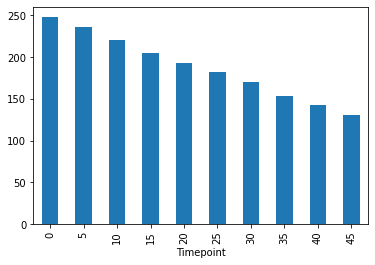

In [57]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
totalmiceTP = cleanData_df.groupby(["Timepoint"])["Mouse ID"].count()
totalmiceTP.plot(kind = "bar", x = "Timepoint", y = totalmiceTP)
totalmiceTP


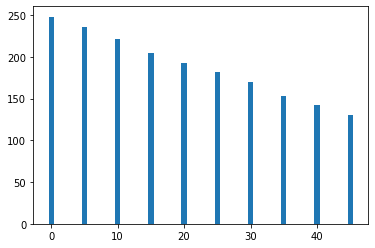

In [64]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(totalmiceTP.index.values, totalmiceTP.values)
plt.show()


Sex
Female    922
Male      958
Name: Sex, dtype: int64

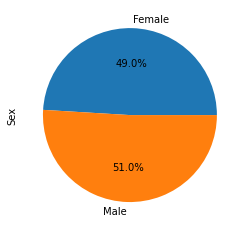

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
femaleVSmaleMice = cleanData_df.groupby(["Sex"])["Sex"].count()
femaleVSmaleMice.plot(kind = "pie",autopct="%1.1f%%")
femaleVSmaleMice

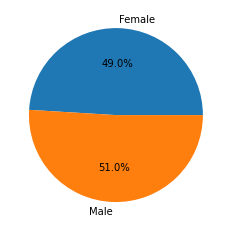

In [66]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(femaleVSmaleMice, labels=femaleVSmaleMice.index.values,autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [69]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
finalTP = cleanData_df.groupby(["Mouse ID"])["Timepoint"].max()
finalTP = finalTP.reset_index()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
tumorVolmerge = pd.merge(finalTP,cleanData_df,on=["Mouse ID", "Timepoint"])
tumorVolmerge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [75]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_list = []
for drug in treatment:
    
    tumor_vol = tumorVolmerge.loc[tumorVolmerge ["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumor_list.append(tumor_volume)


# Create empty list to fill with tumor vol data (for plotting)
 

    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    print(f"The lower quartile of occupancy is: {lowerq}")
    print(f"The upper quartile of occupancy is: {upperq}")
    print(f"The interquartile range of occupancy is: {iqr}")
    print(f"The the median of occupancy is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    outlier = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    outlier 

The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
The the median of occupancy is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
The the median of occupancy is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
The the median of occupancy is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.
The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.2998300

{'whiskers': [<matplotlib.lines.Line2D at 0x16b2978b0>,
 'caps': [<matplotlib.lines.Line2D at 0x16b297f10>,
 'boxes': [<matplotlib.lines.Line2D at 0x16b2975e0>,
 'medians': [<matplotlib.lines.Line2D at 0x16b2a1430>,
 'fliers': [<matplotlib.lines.Line2D at 0x16b2a1700>,
 'means': []}

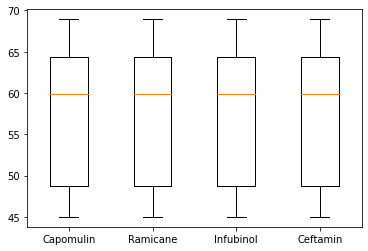

In [76]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_list, labels= treatment)

## Line and Scatter Plots

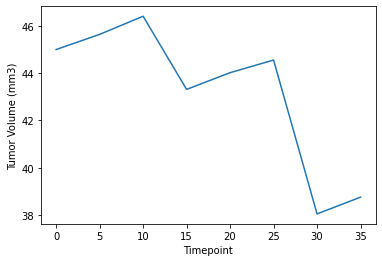

In [80]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_mice = cleanData_df.loc[cleanData_df["Drug Regimen"] == "Capomulin"]

mouse_id = capomulin_mice.loc[cleanData_df["Mouse ID"] == "j246"] 
x = mouse_id["Timepoint"] 
y = mouse_id["Tumor Volume (mm3)"] 
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.plot(x,y)

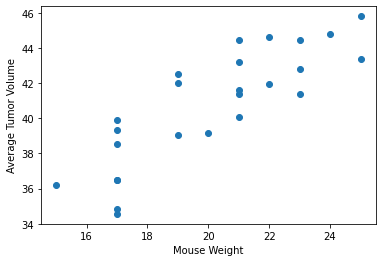

In [81]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_average = capomulin_mice.groupby("Mouse ID").mean()
x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]

plt.scatter(x,y)
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

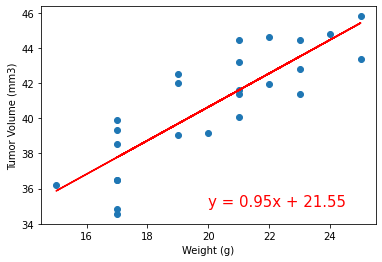

In [82]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = capomulin_average["Weight (g)"]
y = capomulin_average["Tumor Volume (mm3)"]

corr=round(st.pearsonr(x,y)[0],2)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,35),fontsize=15,color="black")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
